In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [228]:
credit = pd.read_csv('D:Analytix lab/case studies/segmentation/CC_GENERAL.csv')

In [229]:
output = pd.ExcelWriter('D:Analytix lab/case studies/segmentation/output.xlsx')

In [230]:
credit

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [231]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [232]:
credit.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [233]:
credit.drop('CUST_ID', axis=1, inplace= True)

In [234]:
credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median(),inplace=True)
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median(),inplace=True)
print(credit.isnull().sum())

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


#### DERIVING NEW KPIS

 Monthly average purchase and cash advance amount

 Purchases by type (one-off, installments)

 Average amount per purchase and cash advance transaction, 

 Limit usage (balance to credit limit ratio), 

 Payments to minimum payments ratio etc.

In [235]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']

In [236]:
credit.loc[:,['Monthly_cash_advance', 'Monthly_avg_purchase']]

,Monthly_cash_advance,Monthly_avg_purchase
0,0.000000,7.950000
1,536.912124,0.000000
2,0.000000,64.430833
3,17.149001,124.916667
4,0.000000,1.333333
...,...,...
8945,0.000000,48.520000
8946,0.000000,50.000000
8947,0.000000,24.066667
8948,6.093130,0.000000


In [237]:
credit['Limit_usage']=credit['BALANCE']/credit['CREDIT_LIMIT']

In [238]:
def purchase(credit):   
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_of'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'istallment_purchse'

In [239]:
credit['purchase_type']=credit.apply(purchase,axis=1)

In [240]:
credit['purchase_type'].value_counts()

both                  2774
istallment_purchse    2260
none                  2042
one_of                1874
Name: purchase_type, dtype: int64

In [241]:
credit.Limit_usage

0       0.040901
1       0.457495
2       0.332687
3       0.222223
4       0.681429
          ...   
8945    0.028494
8946    0.019183
8947    0.023399
8948    0.026915
8949    0.310590
Name: Limit_usage, Length: 8950, dtype: float64

In [242]:
credit.Limit_usage

0       0.040901
1       0.457495
2       0.332687
3       0.222223
4       0.681429
          ...   
8945    0.028494
8946    0.019183
8947    0.023399
8948    0.026915
8949    0.310590
Name: Limit_usage, Length: 8950, dtype: float64

In [243]:
credit['payment_minpay']=credit['PAYMENTS']/credit['MINIMUM_PAYMENTS']

In [244]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [245]:
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,Limit_usage,purchase_type,payment_minpay
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,istallment_purchse,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,none,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,one_of,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,0.222223,one_of,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,one_of,2.771075


In [246]:
numeric_var_names=[key for key in dict(credit.dtypes) if dict(credit.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(credit.dtypes) if dict(credit.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'Limit_usage', 'payment_minpay']
['purchase_type']


In [247]:
num_var = credit[numeric_var_names]
cat_var = credit[cat_var_names]

In [248]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

num_var = num_var.apply(lambda x: outlier_capping(x))

In [249]:
num_var.to_excel(output, ' outlier_treatment', index = True)

In [250]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), 
                      x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), 
                      x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=num_var.apply(var_summary)

In [251]:
round(num_summary,2).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,13792368.03,1541.05,873.39,1966.60,3867505.66,0.07,0.07,8.81,23.58,128.28,873.39,2054.14,4338.56,5909.11,9337.09,9338.80
BALANCE_FREQUENCY,8950.0,0.0,7858.85,0.88,1.00,0.23,0.05,0.09,0.09,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
PURCHASES,8950.0,0.0,8379251.67,936.23,361.28,1525.19,2326189.83,0.00,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3998.62,8961.80,8977.29
ONEOFF_PURCHASES,8950.0,0.0,4801619.28,536.49,38.00,1096.91,1203219.25,0.00,0.00,0.00,0.00,0.00,38.00,577.41,1600.10,2671.09,6684.20,6689.90
INSTALLMENTS_PURCHASES,8950.0,0.0,3441260.40,384.50,89.00,676.27,457342.56,0.00,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1750.09,3885.85,3886.24
CASH_ADVANCE,8950.0,0.0,8376492.70,935.92,0.00,1775.77,3153373.82,0.00,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4647.17,9584.01,9588.16
PURCHASES_FREQUENCY,8950.0,0.0,4388.64,0.49,0.50,0.40,0.16,0.00,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1812.00,0.20,0.08,0.30,0.09,0.00,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3261.71,0.36,0.17,0.40,0.16,0.00,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1199.45,0.13,0.00,0.20,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.83,0.83


In [252]:
num_summary.to_excel(output, ' num_summary', index = True)

In [253]:
cat_var = pd.get_dummies(cat_var)

In [254]:
cat_var

,purchase_type_both,purchase_type_istallment_purchse,purchase_type_none,purchase_type_one_of
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,1,0,0
8946,0,1,0,0
8947,0,1,0,0
8948,0,0,1,0


In [255]:
cat_var.to_excel(output, ' dummies', index = True)

In [256]:
credit_new = pd.concat([num_var, cat_var], axis=1)
credit_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,Limit_usage,payment_minpay,purchase_type_both,purchase_type_istallment_purchse,purchase_type_none,purchase_type_one_of
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,12,7.950000,0.000000,0.040901,1.446508,0,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.222222,12,0.000000,536.912124,0.457495,3.826241,0,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,12,64.430833,0.000000,0.332687,0.991682,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,12,124.916667,17.149001,0.222223,0.000000,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,12,1.333333,0.000000,0.681429,2.771075,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.500000,6,48.520000,0.000000,0.028494,6.660231,0,1,0,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.000000,6,50.000000,0.000000,0.019183,0.883197,0,1,0,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,0.250000,6,24.066667,0.000000,0.023399,0.986076,0,1,0,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,0.250000,6,0.000000,6.093130,0.026915,0.942505,0,0,1,0


In [257]:
credit_new.to_excel(output, 'credit_new', index = True)

In [258]:
credit_new.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Monthly_avg_purchase                0
Monthly_cash_advance                0
Limit_usage                         0
payment_minpay                      0
purchase_type_both                  0
purchase_type_istallment_purchse    0
purchase_type_none                  0
purchase_type_one_of                0
dtype: int64

In [259]:
corr = credit_new.corr()
corr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,Limit_usage,payment_minpay,purchase_type_both,purchase_type_istallment_purchse,purchase_type_none,purchase_type_one_of
BALANCE,1.000000,0.336473,0.165697,0.155082,0.093372,0.541226,-0.087193,0.070796,-0.072010,0.463637,...,-0.331618,0.074122,0.162593,0.516470,0.578157,-0.229861,0.076554,-0.210774,0.163342,-0.030422
BALANCE_FREQUENCY,0.336473,1.000000,0.170515,0.137893,0.153734,0.107785,0.232890,0.202845,0.179472,0.193894,...,-0.098040,0.121525,0.166385,0.093842,0.449220,-0.226571,0.194377,-0.132176,0.010821,-0.090963
PURCHASES,0.165697,0.170515,1.000000,0.885793,0.708735,-0.091164,0.504218,0.608351,0.400843,-0.149419,...,0.202887,0.107263,0.994358,-0.095085,-0.085737,0.358738,0.502341,-0.156000,-0.333761,-0.060172
ONEOFF_PURCHASES,0.155082,0.137893,0.885793,1.000000,0.333809,-0.064195,0.349884,0.683819,0.158892,-0.103046,...,0.145981,0.080378,0.883943,-0.066990,-0.066049,0.336323,0.423637,-0.284287,-0.265931,0.096313
INSTALLMENTS_PURCHASES,0.093372,0.153734,0.708735,0.333809,1.000000,-0.102052,0.551693,0.248240,0.634500,-0.162397,...,0.215048,0.103310,0.700536,-0.105991,-0.090498,0.247198,0.434702,0.109896,-0.309136,-0.292610
CASH_ADVANCE,0.541226,0.107785,-0.091164,-0.064195,-0.102052,1.000000,-0.249835,-0.104954,-0.207395,0.683400,...,-0.179068,-0.083485,-0.087192,0.983706,0.260330,-0.008216,-0.085792,-0.174898,0.301416,-0.026607
PURCHASES_FREQUENCY,-0.087193,0.232890,0.504218,0.349884,0.551693,-0.249835,1.000000,0.501343,0.862934,-0.312493,...,0.305802,0.061506,0.504918,-0.248987,-0.221177,0.125060,0.515593,0.295918,-0.664037,-0.217147
ONEOFF_PURCHASES_FREQUENCY,0.070796,0.202845,0.608351,0.683819,0.248240,-0.104954,0.501343,1.000000,0.142329,-0.113575,...,0.157531,0.082466,0.607920,-0.106243,-0.097169,0.225962,0.525795,-0.394452,-0.368981,0.204113
PURCHASES_INSTALLMENTS_FREQUENCY,-0.072010,0.179472,0.400843,0.158892,0.634500,-0.207395,0.862934,0.142329,1.000000,-0.265907,...,0.250087,0.073275,0.396831,-0.208256,-0.178714,0.085444,0.463390,0.430024,-0.498338,-0.471909
CASH_ADVANCE_FREQUENCY,0.463637,0.193894,-0.149419,-0.103046,-0.162397,0.683400,-0.312493,-0.113575,-0.265907,1.000000,...,-0.253292,-0.129136,-0.144522,0.681374,0.397972,-0.097913,-0.095419,-0.240403,0.379269,-0.026016


In [260]:
corr.to_excel(output, ' correlation', index = True)

In [261]:
import seaborn as sns

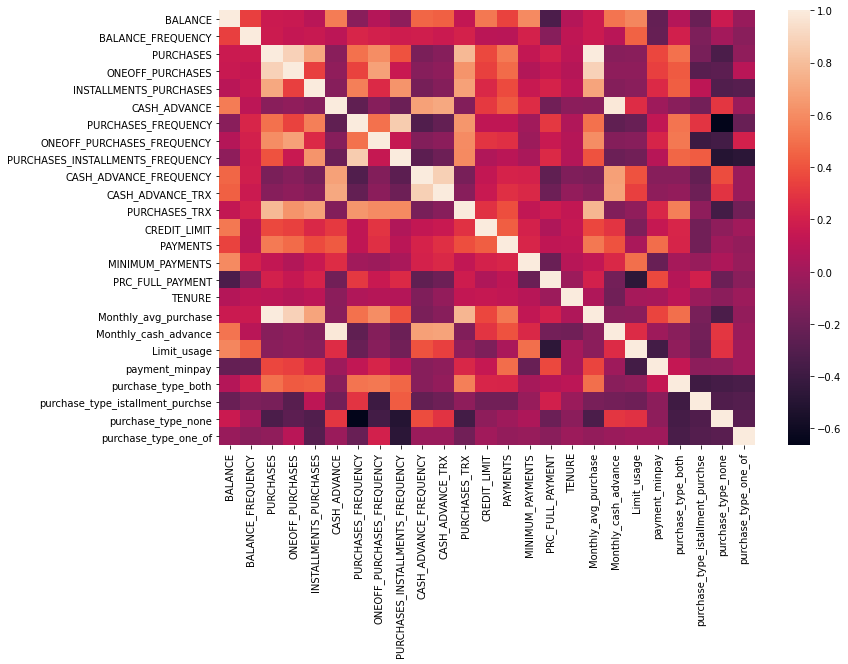

In [262]:
plt.figure(figsize=(12,8))
sns.heatmap(corr)

heatmap shows correlation between some features, using pca for dimension reduction.

### first standardise the data

In [263]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
cr_scaled=sc.fit_transform(credit_new)
cr_scaled

array([[-0.76285553, -0.25596817, -0.55132729, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [ 0.84486711,  0.13250091, -0.61388057, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [ 0.48518086,  0.52096999, -0.10691708, ..., -0.58122082,
        -0.54369045,  1.94316249],
       ...,
       [-0.7717557 , -0.19122546, -0.51919825, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [-0.77681097, -0.19122546, -0.61388057, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [-0.59412458, -0.90341664,  0.10295769, ..., -0.58122082,
        -0.54369045,  1.94316249]])

### PCA

In [264]:
from sklearn.decomposition import PCA

In [265]:
pc = PCA(n_components=15)

In [266]:
pc.fit(cr_scaled)

PCA(n_components=15)

In [267]:
pc.explained_variance_ 

array([6.71589744, 4.91151015, 2.35827844, 2.03320375, 1.28840989,
       1.25321187, 1.04294019, 0.8901253 , 0.76494192, 0.62399632,
       0.56456087, 0.50306931, 0.43444665, 0.3691104 , 0.31539966])

In [268]:
sum(pc.explained_variance_)

24.069102156391573

In [269]:
var= pc.explained_variance_ratio_
var

array([0.26860588, 0.19643845, 0.0943206 , 0.08131906, 0.05153064,
       0.05012287, 0.04171295, 0.03560103, 0.03059426, 0.02495706,
       0.02257991, 0.02012052, 0.01737592, 0.01476277, 0.01261458])

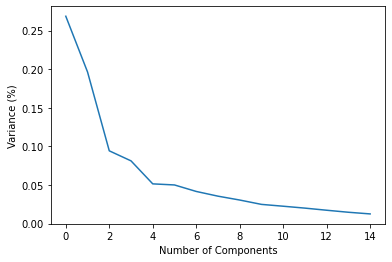

In [270]:
plt.figure()
plt.plot(var)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

In [271]:
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
var1

array([26.86, 46.5 , 55.93, 64.06, 69.21, 74.22, 78.39, 81.95, 85.01,
       87.51, 89.77, 91.78, 93.52, 95.  , 96.26])

In [272]:
round(pd.DataFrame({'Eigen_value': pc.explained_variance_, 'Cumm_variance':var1}, index=range(1,16)),2)

,Eigen_value,Cumm_variance
1,6.72,26.86
2,4.91,46.50
3,2.36,55.93
4,2.03,64.06
5,1.29,69.21
6,1.25,74.22
7,1.04,78.39
8,0.89,81.95
9,0.76,85.01
10,0.62,87.51


In [273]:
pc_final=PCA(n_components=8).fit(cr_scaled)

In [274]:
pc_final.explained_variance_

array([6.71589744, 4.91151015, 2.35827844, 2.03320375, 1.28840989,
       1.25321187, 1.04294019, 0.89012529])

In [275]:
reduced_cr=pc_final.fit_transform(cr_scaled)

In [276]:
dd=pd.DataFrame(reduced_cr)

In [277]:
dd

,0,1,2,3,4,5,6,7
0,-1.458736,-2.388037,-0.410820,0.272058,0.476374,0.481764,0.027647,-0.129922
1,-2.704100,3.319372,0.642519,1.779503,-0.109650,0.809426,-0.776708,0.265003
2,0.695591,-0.305714,1.232781,-2.499228,1.650481,-1.252045,-0.830773,0.005762
3,-0.681199,-0.551840,1.963539,-1.446849,1.554759,0.261007,-0.053739,0.773257
4,-1.787244,-1.144355,0.804863,-2.047220,0.738633,-0.104616,0.155861,-0.972147
...,...,...,...,...,...,...,...,...
8945,0.048666,-2.767378,-1.227726,1.987761,0.034097,-1.994374,2.877116,0.713429
8946,-0.280201,-2.488891,-1.717581,1.198383,0.113639,-2.014261,2.971796,1.347328
8947,-0.639234,-2.768191,-1.116803,1.529161,0.153486,-1.912529,2.897728,1.448218
8948,-2.615643,-1.390135,1.009798,0.621931,-2.055993,-0.845501,2.881148,1.605575


In [278]:
col_list=credit_new.columns

In [279]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(8)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
BALANCE,-0.003933,0.361997,-0.158027,-0.128065,0.197646,0.134391,-0.051021,0.207495
BALANCE_FREQUENCY,0.063900,0.162016,-0.259673,-0.245886,-0.133352,-0.138013,-0.074055,-0.438432
PURCHASES,0.343357,0.116603,0.092756,-0.045520,-0.009757,0.127851,0.208521,-0.021102
ONEOFF_PURCHASES,0.287276,0.124047,0.235796,-0.141726,0.001100,0.039590,0.178910,-0.037817
INSTALLMENTS_PURCHASES,0.285167,0.046364,-0.177498,0.129889,-0.043159,0.177374,0.133852,0.011432
CASH_ADVANCE,-0.106192,0.357718,0.015946,0.268206,0.091471,-0.137181,-0.072141,0.016259
PURCHASES_FREQUENCY,0.299231,-0.074733,-0.250002,0.066688,0.092039,-0.293066,-0.065082,-0.051588
ONEOFF_PURCHASES_FREQUENCY,0.259850,0.077641,0.208729,-0.225676,-0.019911,-0.293391,-0.100450,-0.025436
PURCHASES_INSTALLMENTS_FREQUENCY,0.253657,-0.079013,-0.388739,0.194585,-0.016100,-0.108470,-0.040752,0.006879
CASH_ADVANCE_FREQUENCY,-0.139708,0.331804,-0.019032,0.132206,-0.112343,-0.228219,0.031882,-0.180984


In [280]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(8)])

PC_0    0.268606
PC_1    0.196438
PC_2    0.094321
PC_3    0.081319
PC_4    0.051531
PC_5    0.050123
PC_6    0.041713
PC_7    0.035601
dtype: float64

In [281]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=credit_new.columns).T

In [282]:
Loadings

,0,1,2,3,4,5,6,7
BALANCE,-0.010193,0.802256,-0.242677,-0.182609,0.224345,0.150447,-0.052105,0.195765
BALANCE_FREQUENCY,0.165597,0.359058,-0.398772,-0.350610,-0.151365,-0.154502,-0.075628,-0.413645
PURCHASES,0.889812,0.258415,0.142443,-0.064907,-0.011075,0.143125,0.212951,-0.019909
ONEOFF_PURCHASES,0.744477,0.274911,0.362104,-0.202087,0.001249,0.044319,0.182710,-0.035679
INSTALLMENTS_PURCHASES,0.739011,0.102752,-0.272579,0.185209,-0.048988,0.198565,0.136695,0.010786
CASH_ADVANCE,-0.275198,0.792772,0.024488,0.382436,0.103827,-0.153570,-0.073674,0.015339
PURCHASES_FREQUENCY,0.775460,-0.165622,-0.383920,0.095090,0.104472,-0.328078,-0.066464,-0.048672
ONEOFF_PURCHASES_FREQUENCY,0.673402,0.172068,0.320539,-0.321792,-0.022600,-0.328442,-0.102584,-0.023998
PURCHASES_INSTALLMENTS_FREQUENCY,0.657353,-0.175108,-0.596975,0.277459,-0.018275,-0.121429,-0.041618,0.006490
CASH_ADVANCE_FREQUENCY,-0.362055,0.735342,-0.029228,0.188513,-0.127518,-0.255484,0.032560,-0.170752


In [283]:
Loadings.to_excel(output, ' loadings', index = True)

In [284]:
from sklearn.cluster import KMeans
km_4=KMeans(n_clusters=4,random_state=123)
km_4.fit(reduced_cr)
km_4.labels_

array([3, 2, 1, ..., 3, 1, 1])

In [285]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5.fit(reduced_cr)
km_5.labels_

array([1, 0, 4, ..., 1, 2, 2])

In [286]:
km_6=KMeans(n_clusters=6,random_state=123)
km_6.fit(reduced_cr)
km_6.labels_

array([0, 5, 4, ..., 0, 1, 4])

In [287]:
km_7=KMeans(n_clusters=7,random_state=123)
km_7.fit(reduced_cr)
km_7.labels_

array([1, 6, 5, ..., 1, 2, 5])

In [288]:
credit_new['cluster_4'] = km_4.labels_
credit_new['cluster_5'] = km_5.labels_
credit_new['cluster_6'] = km_6.labels_
credit_new['cluster_7'] = km_7.labels_
credit_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Limit_usage,payment_minpay,purchase_type_both,purchase_type_istallment_purchse,purchase_type_none,purchase_type_one_of,cluster_4,cluster_5,cluster_6,cluster_7
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.040901,1.446508,0,1,0,0,3,1,0,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.457495,3.826241,0,0,1,0,2,0,5,6
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.332687,0.991682,0,0,0,1,1,4,4,5
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.222223,0.000000,0,0,0,1,1,2,4,5
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.681429,2.771075,0,0,0,1,1,2,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.028494,6.660231,0,1,0,0,3,1,0,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.019183,0.883197,0,1,0,0,3,1,0,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,0.023399,0.986076,0,1,0,0,3,1,0,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,0.026915,0.942505,0,0,1,0,1,2,1,2


#### segment size check

In [289]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

3    0.379330
1    0.369497
2    0.126480
0    0.124693
dtype: float64

In [290]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

2    0.342346
4    0.244469
1    0.233520
0    0.117989
3    0.061676
dtype: float64

In [291]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())

0    0.237095
2    0.226257
1    0.198547
4    0.183911
5    0.093743
3    0.060447
dtype: float64

In [292]:
pd.Series(km_7.labels_).value_counts()/sum(pd.Series(km_7.labels_).value_counts())

1    0.235978
2    0.195196
5    0.180894
4    0.174972
6    0.091955
0    0.091844
3    0.029162
dtype: float64

### SC score

In [293]:
from sklearn import metrics
metrics.silhouette_score(dd, km_4.labels_)

0.21945696778913526

In [294]:
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(dd, km.labels_))

In [295]:
scores

[0.2756442983688082,
 0.23401659237124192,
 0.21945696778913526,
 0.24616354078614988,
 0.28615808192017933,
 0.2725747808796575,
 0.2733577591365658,
 0.2602063404871398,
 0.25880981761222727,
 0.25386733357584895,
 0.25447821172797686,
 0.25772536124519524,
 0.2541969007110803,
 0.23471581246873216,
 0.2334457065560771,
 0.23938731087626985,
 0.2423428785389389,
 0.24412694057006]

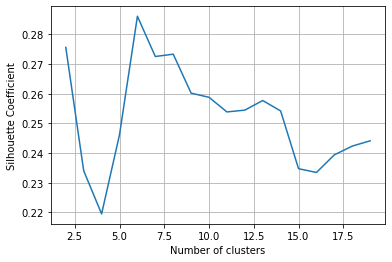

In [296]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [297]:
score={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n, random_state=123)
    km_score.fit(reduced_cr)
    score[n]=metrics.silhouette_score(dd,km_score.labels_)

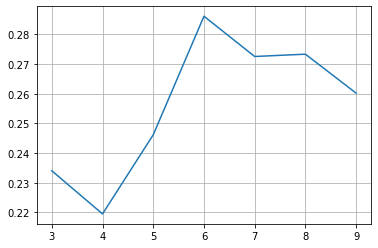

In [298]:
pd.Series(score).plot()
plt.grid(True)

In [299]:
score

{3: 0.23401659237124192,
 4: 0.21945696778913526,
 5: 0.24616354078614988,
 6: 0.28615808192017933,
 7: 0.2725747808796575,
 8: 0.2733577591365658,
 9: 0.2602063404871398}

### ELBOW curve

In [300]:
cluster_range = range( 2, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( dd )
    cluster_errors.append( clusters.inertia_ )

In [301]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,2,144994.513747
1,3,117241.999036
2,4,101914.959567
3,5,89662.221323
4,6,78211.666039
5,7,73769.356639
6,8,69660.863781
7,9,66182.480975
8,10,63335.428533
9,11,60706.623955


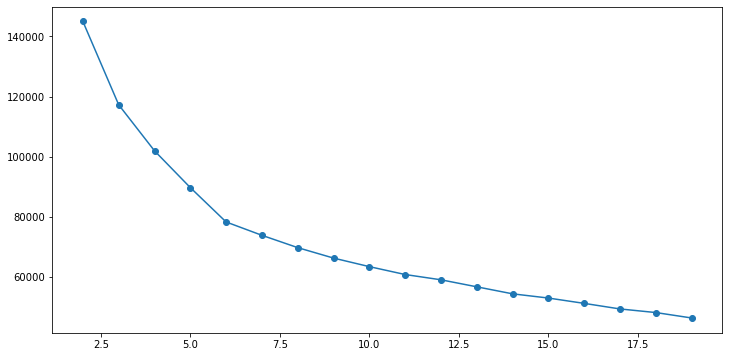

In [302]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [303]:
credit_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Limit_usage,payment_minpay,purchase_type_both,purchase_type_istallment_purchse,purchase_type_none,purchase_type_one_of,cluster_4,cluster_5,cluster_6,cluster_7
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.040901,1.446508,0,1,0,0,3,1,0,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.457495,3.826241,0,0,1,0,2,0,5,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.332687,0.991682,0,0,0,1,1,4,4,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.222223,0.000000,0,0,0,1,1,2,4,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.681429,2.771075,0,0,0,1,1,2,4,5


In [304]:
credit_new.cluster_4.value_counts()*100/sum(credit_new.cluster_4.value_counts())

3    37.932961
1    36.949721
2    12.648045
0    12.469274
Name: cluster_4, dtype: float64

In [305]:
credit_new.cluster_5.value_counts()*100/sum(credit_new.cluster_5.value_counts())

2    34.234637
4    24.446927
1    23.351955
0    11.798883
3     6.167598
Name: cluster_5, dtype: float64

In [306]:
credit_new.cluster_6.value_counts()*100/sum(credit_new.cluster_6.value_counts())

0    23.709497
2    22.625698
1    19.854749
4    18.391061
5     9.374302
3     6.044693
Name: cluster_6, dtype: float64

In [307]:
credit_new.cluster_7.value_counts()*100/sum(credit_new.cluster_7.value_counts())

1    23.597765
2    19.519553
5    18.089385
4    17.497207
6     9.195531
0     9.184358
3     2.916201
Name: cluster_7, dtype: float64

In [308]:
size=pd.concat([pd.Series(credit_new.cluster_4.size), pd.Series.sort_index(credit_new.cluster_4.value_counts()),
           pd.Series.sort_index(credit_new.cluster_5.value_counts()), pd.Series.sort_index(credit_new.cluster_6.value_counts()),
           pd.Series.sort_index(credit_new.cluster_7.value_counts())])

In [309]:
size

0    8950
0    1116
1    3307
2    1132
3    3395
0    1056
1    2090
2    3064
3     552
4    2188
0    2122
1    1777
2    2025
3     541
4    1646
5     839
0     822
1    2112
2    1747
3     261
4    1566
5    1619
6     823
dtype: int64

In [310]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/credit_new.cluster_6.size, columns=['Seg_Pct'])

In [311]:
Seg_Pct.T

,0,0,1,2,3,0,1,2,3,4,...,3,4,5,0,1,2,3,4,5,6
Seg_Pct,1.0,0.124693,0.369497,0.12648,0.37933,0.117989,0.23352,0.342346,0.061676,0.244469,...,0.060447,0.183911,0.093743,0.091844,0.235978,0.195196,0.029162,0.174972,0.180894,0.091955


In [312]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,3,0,1,2,3,4,...,3,4,5,0,1,2,3,4,5,6
Seg_size,8950.0,1116.000000,3307.000000,1132.00000,3395.00000,1056.000000,2090.00000,3064.000000,552.000000,2188.000000,...,541.000000,1646.000000,839.000000,822.000000,2112.000000,1747.000000,261.000000,1566.000000,1619.000000,823.000000
Seg_Pct,1.0,0.124693,0.369497,0.12648,0.37933,0.117989,0.23352,0.342346,0.061676,0.244469,...,0.060447,0.183911,0.093743,0.091844,0.235978,0.195196,0.029162,0.174972,0.180894,0.091955


In [313]:
credit_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Limit_usage,payment_minpay,purchase_type_both,purchase_type_istallment_purchse,purchase_type_none,purchase_type_one_of,cluster_4,cluster_5,cluster_6,cluster_7
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.040901,1.446508,0,1,0,0,3,1,0,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.457495,3.826241,0,0,1,0,2,0,5,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.332687,0.991682,0,0,0,1,1,4,4,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.222223,0.000000,0,0,0,1,1,2,4,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.681429,2.771075,0,0,0,1,1,2,4,5


In [314]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profiling_output = pd.concat([credit_new.apply(lambda x: x.mean()).T,
                              credit_new.groupby('cluster_4').apply(lambda x: x.mean()).T,
                              credit_new.groupby('cluster_5').apply(lambda x: x.mean()).T,
                              credit_new.groupby('cluster_6').apply(lambda x: x.mean()).T,
                              credit_new.groupby('cluster_7').apply(lambda x: x.mean()).T], axis=1)
Profiling_output

,0,0,1,2,3,0,1,2,3,4,...,3,4,5,0,1,2,3,4,5,6
BALANCE,1541.046707,2246.939138,1233.717367,4395.075115,656.746859,4464.971065,539.775966,1245.387494,2871.197304,1164.743427,...,2861.665874,1038.785351,4787.028298,1667.397761,568.987608,1618.794795,3633.311251,1144.597516,1044.575379,4811.821685
BALANCE_FREQUENCY,0.878083,0.974923,0.844467,0.955344,0.853234,0.956300,0.810268,0.833736,0.979798,0.941553,...,0.981005,0.815235,0.958754,0.968354,0.814394,0.873486,0.982477,0.924421,0.817927,0.958184
PURCHASES,936.229237,4092.082016,290.237877,432.933454,695.903037,431.065975,502.857349,226.271309,5668.648659,1394.280069,...,5700.943475,627.040030,534.166031,3096.772920,491.603958,1.850601,7399.597663,940.416315,596.095120,514.141956
ONEOFF_PURCHASES,536.493774,2592.410663,281.501258,263.285228,200.154769,266.537633,0.382033,222.156606,3590.192949,848.666700,...,3598.384048,626.608244,321.855874,1877.074282,0.033097,0.357001,4733.303479,513.928295,596.153138,306.919550
INSTALLMENTS_PURCHASES,384.498368,1377.761787,8.771070,167.716705,496.264212,164.623902,503.031293,4.151886,1828.265495,545.776152,...,1851.510246,0.488852,209.704101,1211.323185,492.264262,1.493600,2162.639602,426.684170,0.000000,207.345019
CASH_ADVANCE,935.920972,475.434489,662.874877,4504.401012,163.416392,4673.620751,154.265024,713.522917,610.815232,272.089151,...,565.970433,375.255218,5159.841645,361.894716,167.469429,1224.720810,686.128611,320.119762,381.599395,5209.642794
PURCHASES_FREQUENCY,0.490351,0.929931,0.159030,0.273099,0.741023,0.267135,0.713155,0.112952,0.940425,0.800206,...,0.943674,0.314519,0.319589,0.934282,0.705836,0.003403,0.933786,0.716603,0.309234,0.312781
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.680814,0.147271,0.125979,0.124469,0.124951,0.000447,0.105907,0.719000,0.437717,...,0.722830,0.314047,0.147749,0.638787,0.000079,0.000350,0.756432,0.300519,0.309028,0.143109
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.724454,0.013647,0.176421,0.650482,0.170588,0.676595,0.007433,0.758617,0.560310,...,0.764954,0.000677,0.210987,0.744296,0.669724,0.002719,0.752804,0.552722,0.000000,0.204922
CASH_ADVANCE_FREQUENCY,0.134017,0.069810,0.142248,0.470550,0.034894,0.479460,0.027170,0.151398,0.072969,0.060417,...,0.067493,0.081207,0.502149,0.059101,0.029831,0.230936,0.075670,0.074697,0.082824,0.502555


In [315]:
profling_output_final = pd.concat([Seg_size.T, Seg_Pct.T, Profiling_output], axis=0)

profling_output_final

,0,0,1,2,3,0,1,2,3,4,...,3,4,5,0,1,2,3,4,5,6
Seg_size,8950.000000,1116.000000,3307.000000,1132.000000,3395.000000,1056.000000,2090.000000,3064.000000,552.000000,2188.000000,...,541.000000,1646.000000,839.000000,822.000000,2112.000000,1747.000000,261.000000,1566.000000,1619.000000,823.000000
Seg_Pct,1.000000,0.124693,0.369497,0.126480,0.379330,0.117989,0.233520,0.342346,0.061676,0.244469,...,0.060447,0.183911,0.093743,0.091844,0.235978,0.195196,0.029162,0.174972,0.180894,0.091955
BALANCE,1541.046707,2246.939138,1233.717367,4395.075115,656.746859,4464.971065,539.775966,1245.387494,2871.197304,1164.743427,...,2861.665874,1038.785351,4787.028298,1667.397761,568.987608,1618.794795,3633.311251,1144.597516,1044.575379,4811.821685
BALANCE_FREQUENCY,0.878083,0.974923,0.844467,0.955344,0.853234,0.956300,0.810268,0.833736,0.979798,0.941553,...,0.981005,0.815235,0.958754,0.968354,0.814394,0.873486,0.982477,0.924421,0.817927,0.958184
PURCHASES,936.229237,4092.082016,290.237877,432.933454,695.903037,431.065975,502.857349,226.271309,5668.648659,1394.280069,...,5700.943475,627.040030,534.166031,3096.772920,491.603958,1.850601,7399.597663,940.416315,596.095120,514.141956
ONEOFF_PURCHASES,536.493774,2592.410663,281.501258,263.285228,200.154769,266.537633,0.382033,222.156606,3590.192949,848.666700,...,3598.384048,626.608244,321.855874,1877.074282,0.033097,0.357001,4733.303479,513.928295,596.153138,306.919550
INSTALLMENTS_PURCHASES,384.498368,1377.761787,8.771070,167.716705,496.264212,164.623902,503.031293,4.151886,1828.265495,545.776152,...,1851.510246,0.488852,209.704101,1211.323185,492.264262,1.493600,2162.639602,426.684170,0.000000,207.345019
CASH_ADVANCE,935.920972,475.434489,662.874877,4504.401012,163.416392,4673.620751,154.265024,713.522917,610.815232,272.089151,...,565.970433,375.255218,5159.841645,361.894716,167.469429,1224.720810,686.128611,320.119762,381.599395,5209.642794
PURCHASES_FREQUENCY,0.490351,0.929931,0.159030,0.273099,0.741023,0.267135,0.713155,0.112952,0.940425,0.800206,...,0.943674,0.314519,0.319589,0.934282,0.705836,0.003403,0.933786,0.716603,0.309234,0.312781
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.680814,0.147271,0.125979,0.124469,0.124951,0.000447,0.105907,0.719000,0.437717,...,0.722830,0.314047,0.147749,0.638787,0.000079,0.000350,0.756432,0.300519,0.309028,0.143109


In [316]:
profling_output_final.columns = ['Overall',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7']

In [317]:
profling_output_final = profling_output_final.round(2)

In [318]:
profling_output_final.to_csv('D:Analytix lab/case studies/segmentation/Profiling_output.csv')

In [319]:
output.save()